Step 1: Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 2 : Load and Prepare data

In [3]:
df = pd.read_csv('./data/used_cars.csv')

In [9]:
X = df['km_driven'].values.reshape(-1,1)
y = df['price'].values

X = (X - np.mean(X))/np.std(X)
y = (y - np.mean(y))/np.std(y)

Step 3 : Split data into train/test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

Step 4 : Fit Linear Regression Model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Step 5 : Get Model Parameters

In [15]:
w = model.coef_[0]
b = model.intercept_

print(f"Model: price = {w:.4f} * km_driven + {b:.4f}")

Model: price = -0.9674 * km_driven + 0.0024


Step 6 : Predict

In [16]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Step 7 : Plotting

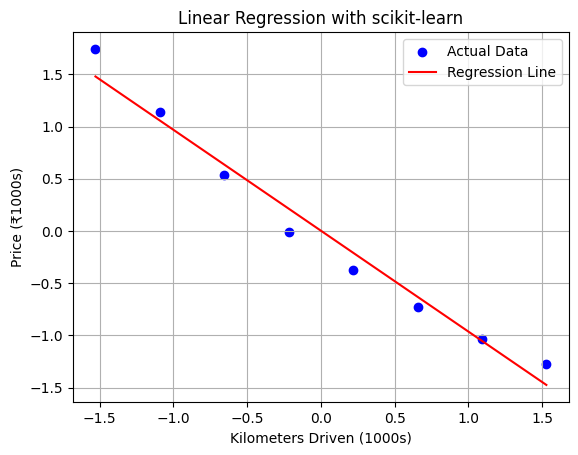

In [17]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Kilometers Driven (1000s)")
plt.ylabel("Price (₹1000s)")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.grid(True)
plt.show()


Step 8 : Metrics

In [18]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.0918
MSE: 0.0085
RMSE: 0.0923
R²: 0.9903


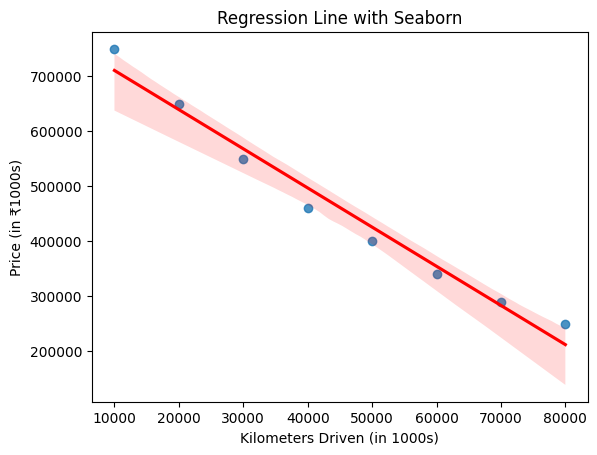

In [24]:
import seaborn as sns
sns.regplot(x='km_driven', y='price', data=df, line_kws={"color": "red"})
plt.title("Regression Line with Seaborn")
plt.xlabel("Kilometers Driven (in 1000s)")
plt.ylabel("Price (in ₹1000s)")
plt.show()


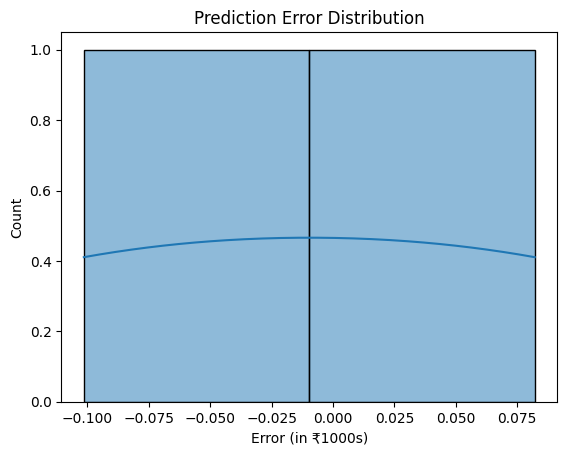

In [27]:
errors = y_test - y_pred_test
sns.histplot(errors, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (in ₹1000s)")
plt.show()
